In [1]:
key="b4fe90ed47f647b5b95b90cf976db83f"
endpoint="https://staging-language-model.cognitiveservices.azure.com/"

In [2]:
import pandas as pd

In [4]:
data=pd.read_csv("Reviews.csv")
data=data.head(200)

In [8]:
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [9]:

client=TextAnalyticsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(key)
)

In [10]:
def Analyse_Summary(summary):
    sent_res=[]
    for j in range(0,len(summary),10):
        summary_sentiment=client.analyze_sentiment(summary[j:j+10])
        temp=[]
        for i in summary_sentiment:
            temp.append(i.sentiment)
        sent_res.extend(temp)
    return sent_res

In [11]:
lis=list(data['Summary'])

In [12]:
print(lis)

['Good Quality Dog Food', 'Not as Advertised', '"Delight" says it all', 'Cough Medicine', 'Great taffy', 'Nice Taffy', 'Great!  Just as good as the expensive brands!', 'Wonderful, tasty taffy', 'Yay Barley', 'Healthy Dog Food', 'The Best Hot Sauce in the World', 'My cats LOVE this "diet" food better than their regular food', 'My Cats Are Not Fans of the New Food', 'fresh and greasy!', 'Strawberry Twizzlers - Yummy', 'Lots of twizzlers, just what you expect.', 'poor taste', 'Love it!', 'GREAT SWEET CANDY!', 'Home delivered twizlers', 'Always fresh', 'TWIZZLERS', 'Delicious product!', 'Twizzlers', 'Please sell these in Mexico!!', 'Twizzlers - Strawberry', 'Nasty No flavor', 'Great Bargain for the Price', 'YUMMY!', 'The Best Hot Sauce in the World', 'Great machine!', 'THIS IS MY TASTE...', 'Best of the Instant Oatmeals', 'Good Instant', 'Great Irish oatmeal for those in a hurry!', 'satisfying', 'Love Gluten Free Oatmeal!!!', "it's oatmeal", 'GOOD WAY TO START THE DAY....', "Wife's favorit

In [13]:
sentiment=Analyse_Summary(lis)
sentiment_data=pd.DataFrame(sentiment)
sentiment_data

,0
0,positive
1,negative
2,positive
3,neutral
4,positive
...,...
195,neutral
196,neutral
197,neutral
198,positive


In [14]:
def key_phrase(Text):
    key_res=[]
    for j in range(1,len(Text),10):
        temp=[]
        summary_keyphrase=client.extract_key_phrases(Text[j:j+10])
        for i in summary_keyphrase:
            temp.append(i.key_phrases)
        key_res.extend(temp)
    return key_res

In [16]:
a=data['Text'].to_list() 
print(a)

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.', 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".', 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.', 'If you are looking for 

In [17]:
key_p_data=pd.DataFrame(key_phrase(lis1))
key_p_data.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,Jumbo Salted Peanuts,Product,error,vendor,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"light, pillowy citrus gelatin",C.S. Lewis,tiny squares,powdered sugar,tiny mouthful,The Lion,The Wardrobe,yummy treat,The Witch,confection,...,None,None,None,None,None,None,None,None,None,None
2,Root Beer Extract,secret ingredient,cherry soda,Robitussin,addition,flavor,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Great taffy,great price,wide assortment,yummy taffy,taffy lover,Delivery,deal,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,five pound bag,red/black licorice-flavored pieces,wild hair,many flavors,root beer,particular favorites,delightful treat,taffy,watermelon,peppermint,...,None,None,None,None,None,None,None,None,None,None


In [18]:

def entities(Text):
    entities=[]
    for j in range(0,len(Text),5):
        temp=[]
        ent_res=client.recognize_entities(Text[j:j+5])
        for i in ent_res:
            temp.append([(entity.text, entity.category, entity.subcategory) for entity in i.entities])
        entities.extend(temp)
    return entities

In [21]:
for i in entities(a):
    print(i)

[('Vitality', 'Organization', 'Sports'), ('canned dog food products', 'Product', None), ('stew', 'Product', None), ('processed meat', 'Product', None), ('product', 'Product', None)]
[('Product', 'Product', None), ('Jumbo Salted Peanuts', 'Product', None), ('peanuts', 'Product', None), ('vendor', 'PersonType', None)]
[('confection', 'Product', None), ('gelatin', 'Product', None), ('Filberts', 'Product', None), ('powdered sugar', 'Product', None), ('heaven', 'Location', 'Structural'), ('C.S. Lewis', 'Person', None), ('Edmund', 'Person', None), ('Brother', 'PersonType', None), ('Sisters', 'PersonType', None), ('Witch', 'PersonType', None)]
[('Robitussin', 'Product', None), ('Root Beer Extract', 'Product', None), ('cherry soda', 'Product', None)]
[('taffy', 'Product', None), ('taffy', 'Product', None), ('Delivery', 'Skill', None), ('lover', 'PersonType', None)]
[('taffy', 'Product', None), ('five pound', 'Quantity', 'Dimension'), ('bag', 'Product', None), ('taffy', 'Product', None), ('wate

In [20]:

entities_data=pd.DataFrame(entities(lis1))
entities_data.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,"(Vitality, Organization, Sports)","(canned dog food products, Product, None)","(stew, Product, None)","(processed meat, Product, None)","(product, Product, None)",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"(Product, Product, None)","(Jumbo Salted Peanuts, Product, None)","(peanuts, Product, None)","(vendor, PersonType, None)",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"(confection, Product, None)","(gelatin, Product, None)","(Filberts, Product, None)","(powdered sugar, Product, None)","(heaven, Location, Structural)","(C.S. Lewis, Person, None)","(Edmund, Person, None)","(Brother, PersonType, None)","(Sisters, PersonType, None)","(Witch, PersonType, None)",...,None,None,None,None,None,None,None,None,None,None
3,"(Robitussin, Product, None)","(Root Beer Extract, Product, None)","(cherry soda, Product, None)",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"(taffy, Product, None)","(taffy, Product, None)","(Delivery, Skill, None)","(lover, PersonType, None)",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [22]:
import matplotlib.pyplot as plt

In [24]:
sentiment_data.head()

,0
0,positive
1,negative
2,positive
3,neutral
4,positive


In [25]:
key_p_data.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,Jumbo Salted Peanuts,Product,error,vendor,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"light, pillowy citrus gelatin",C.S. Lewis,tiny squares,powdered sugar,tiny mouthful,The Lion,The Wardrobe,yummy treat,The Witch,confection,...,None,None,None,None,None,None,None,None,None,None
2,Root Beer Extract,secret ingredient,cherry soda,Robitussin,addition,flavor,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Great taffy,great price,wide assortment,yummy taffy,taffy lover,Delivery,deal,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,five pound bag,red/black licorice-flavored pieces,wild hair,many flavors,root beer,particular favorites,delightful treat,taffy,watermelon,peppermint,...,None,None,None,None,None,None,None,None,None,None


In [27]:
entities_data.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,"(Vitality, Organization, Sports)","(canned dog food products, Product, None)","(stew, Product, None)","(processed meat, Product, None)","(product, Product, None)",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"(Product, Product, None)","(Jumbo Salted Peanuts, Product, None)","(peanuts, Product, None)","(vendor, PersonType, None)",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"(confection, Product, None)","(gelatin, Product, None)","(Filberts, Product, None)","(powdered sugar, Product, None)","(heaven, Location, Structural)","(C.S. Lewis, Person, None)","(Edmund, Person, None)","(Brother, PersonType, None)","(Sisters, PersonType, None)","(Witch, PersonType, None)",...,None,None,None,None,None,None,None,None,None,None
3,"(Robitussin, Product, None)","(Root Beer Extract, Product, None)","(cherry soda, Product, None)",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"(taffy, Product, None)","(taffy, Product, None)","(Delivery, Skill, None)","(lover, PersonType, None)",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


C:\Users\Rejinthala sai\AppData\Local\Temp\ipykernel_57564\1414394875.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


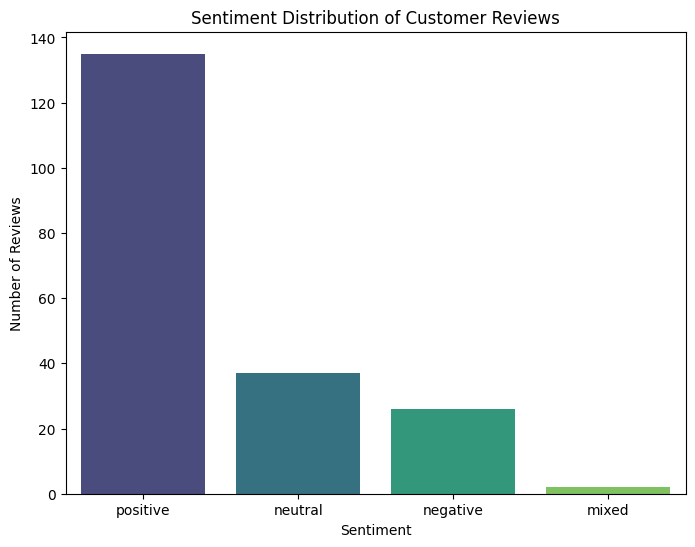

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each sentiment type
sentiment_counts = sentiment_data[0].value_counts()

# Plot the sentiment analysis results
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution of Customer Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()